In [46]:
import pandas as pd

In [47]:
df=pd.read_csv("D:\Jupyter Notebook\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [48]:
pd.options.display.max_columns=500

In [49]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Data Preprocessing 

In [50]:
#Binary=> Attrition	, Gender , Over18, OverTime
df['Attrition']= df['Attrition'].apply(lambda x: 1 if x=="Yes" else 0)
df['Gender']= df['Gender'].apply(lambda x: 1 if x=="Male" else 0)
df['Over18']= df['Over18'].apply(lambda x: 1 if x=="Y" else 0)
df['OverTime']= df['OverTime'].apply(lambda x: 1 if x=="Yes" else 0)

In [51]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [52]:
#one hot encoding=> BusinessTravel,MaritalStatus,JobRole,EducationField,Department
#Using Pandas Dummy fuction for one hot encoding

df=df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df=df.join(pd.get_dummies(df['MaritalStatus'],prefix='MaritalStatus')).drop('MaritalStatus', axis=1)
df=df.join(pd.get_dummies(df['JobRole'],prefix='Role')).drop('JobRole', axis=1)
df=df.join(pd.get_dummies(df['EducationField'],prefix='Field')).drop('EducationField', axis=1)
df=df.join(pd.get_dummies(df['Department'],prefix='Department')).drop('Department', axis=1)

In [53]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Field_Human Resources,Field_Life Sciences,Field_Marketing,Field_Medical,Field_Other,Field_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [54]:
#df=df.map(lambda x: 1 if x is true else 0 if x is flase else x) this code need id one hot encoded give me true flase as output

In [55]:
#Remove Unnecessary Columns
df=df.drop('EmployeeNumber', axis=1)

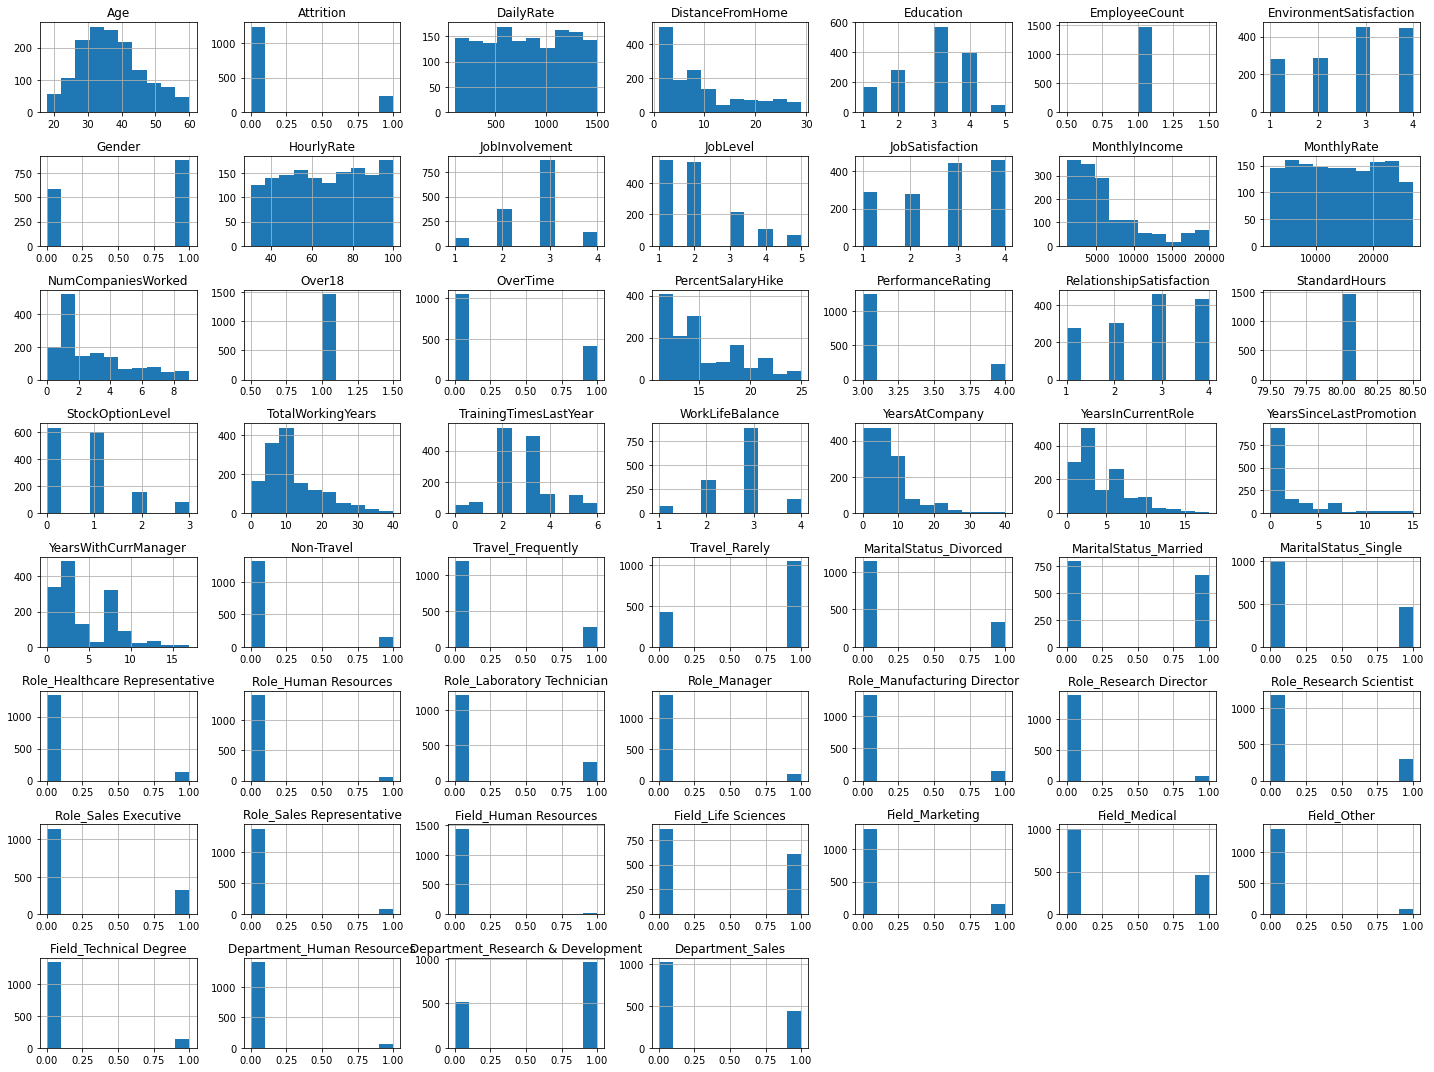

In [56]:
import matplotlib.pyplot as plt

df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()


In [58]:
#Removing columns with only one distinct value in their histogram as they provide no meaningful contribution to this project.
#EmployeeCount, StandardHours, Over18 is the meaningless column.

df=df.drop(['EmployeeCount','StandardHours','Over18'],axis=1)

In [59]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Field_Human Resources,Field_Life Sciences,Field_Marketing,Field_Medical,Field_Other,Field_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


Preprocessing is done.....!

# Model Training And Testing

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

X,y=df.drop('Attrition',axis=1),df['Attrition']
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20, random_state=261)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1470
Number of rows in the training set: 1176
Number of rows in the test set: 294


In [80]:
modelDT=  DecisionTreeClassifier(random_state=42)
modelDT.fit(X_train,y_train)

print('The accuracy of the DecisionTreeClassifier model:', modelDT.score(X_test,y_test))

The accuracy of the DecisionTreeClassifier model: 0.7687074829931972


In [81]:
modelrdf=RandomForestClassifier(n_jobs=-1)
modelrdf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [82]:
print('The accuracy of the random forest model:', modelrdf.score(X_test,y_test))

The accuracy of the random forest model: 0.8605442176870748


In [83]:
modelGrd=GradientBoostingClassifier(random_state=42)
modelGrd.fit(X_train,y_train)

print('The accuracy of the GradientBoostingClassifier model:', modelGrd.score(X_test,y_test))

The accuracy of the GradientBoostingClassifier model: 0.8741496598639455


# Feature importances using Random Forest

In [86]:
modelrdf.feature_importances_

array([0.05954822, 0.04948896, 0.04394168, 0.01696243, 0.02645275,
       0.00994601, 0.04529718, 0.02895021, 0.01997974, 0.02629247,
       0.07531601, 0.04620052, 0.03465314, 0.04677921, 0.03398587,
       0.00505713, 0.02080838, 0.0284266 , 0.05208785, 0.02631596,
       0.02528624, 0.04008176, 0.02686472, 0.02290665, 0.02848477,
       0.00316081, 0.01641476, 0.00754747, 0.0069839 , 0.01061491,
       0.01671374, 0.00273054, 0.00304947, 0.00852353, 0.00150195,
       0.00350751, 0.00091489, 0.00753689, 0.00757669, 0.00818939,
       0.00201176, 0.0067939 , 0.00599991, 0.00898816, 0.00273541,
       0.00940819, 0.00282558, 0.00875772, 0.0073985 ])

In [88]:
dict(sorted(zip(modelrdf.feature_names_in_ , modelrdf.feature_importances_), key=lambda x: x[1], reverse=True))

{'MonthlyIncome': 0.07531600566731897,
 'Age': 0.059548223875129556,
 'TotalWorkingYears': 0.05208784737862572,
 'DailyRate': 0.04948896184083386,
 'OverTime': 0.0467792091454332,
 'MonthlyRate': 0.046200516750516396,
 'HourlyRate': 0.04529717898926442,
 'DistanceFromHome': 0.04394168496976899,
 'YearsAtCompany': 0.04008175680907121,
 'NumCompaniesWorked': 0.03465313590012082,
 'PercentSalaryHike': 0.03398586878575988,
 'JobInvolvement': 0.028950213094718694,
 'YearsWithCurrManager': 0.028484774475878747,
 'StockOptionLevel': 0.028426597926626072,
 'YearsInCurrentRole': 0.02686472218074181,
 'EnvironmentSatisfaction': 0.0264527495513576,
 'TrainingTimesLastYear': 0.026315957805284337,
 'JobSatisfaction': 0.026292465939651122,
 'WorkLifeBalance': 0.025286240315937708,
 'YearsSinceLastPromotion': 0.02290664511192831,
 'RelationshipSatisfaction': 0.020808384083033236,
 'JobLevel': 0.019979737004815413,
 'Education': 0.016962430694990552,
 'MaritalStatus_Single': 0.016713735888222975,
 'Tr

In [90]:
sorted_importances=dict(sorted(zip(modelrdf.feature_names_in_,modelrdf.feature_importances_),key=lambda x : x[1],reverse=True))

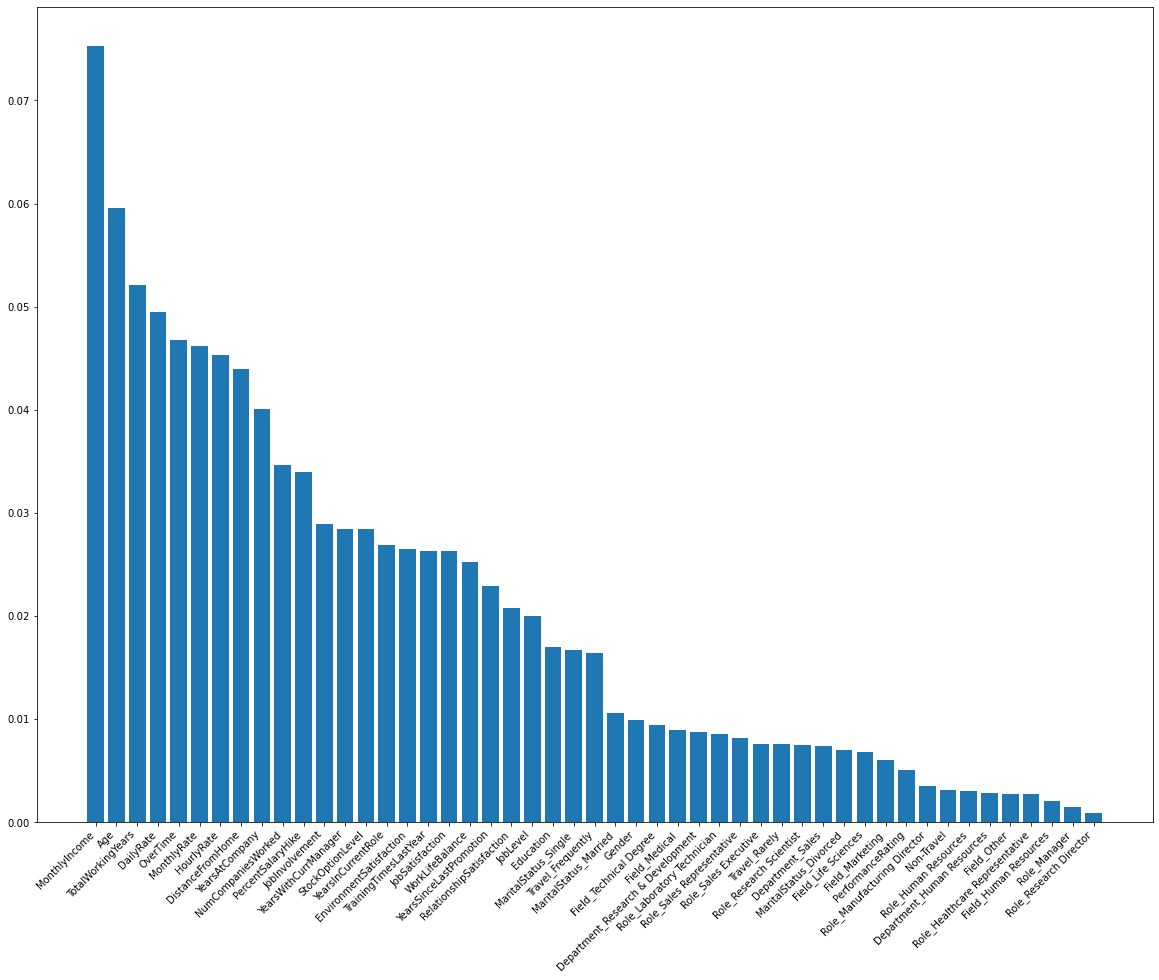

In [91]:
plt.figure(figsize=(20,15))
plt.bar(sorted_importances.keys(),sorted_importances.values())
plt.xticks(rotation=45,ha='right')
plt.show()